# The BIDSLayout

In [3]:
from bids import BIDSLayout, BIDSValidator

data_dir = '/Users/timvigers/Documents/Work/Neuroimaging/Examples/Localizer'
layout = BIDSLayout(data_dir, derivatives=True)
layout

/opt/homebrew/lib/python3.10/site-packages/bids/layout/validation.py:156: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


BIDS Layout: ...euroimaging/Examples/Localizer | Subjects: 94 | Sessions: 0 | Runs: 0

In [4]:
f = layout.get()[0]
f

<BIDSJSONFile filename='/Users/timvigers/Documents/Work/Neuroimaging/Examples/Localizer/dataset_description.json'>

In [5]:
layout.to_df()

/opt/homebrew/lib/python3.10/site-packages/bids/layout/layout.py:525: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  data = data.pivot('path', 'entity', 'value')


entity,path,datatype,extension,subject,suffix,task
0,/Users/timvigers/Documents/Work/Neuroimaging/E...,NaN,.json,NaN,description,NaN
1,/Users/timvigers/Documents/Work/Neuroimaging/E...,NaN,.DS_Store,NaN,,NaN
2,/Users/timvigers/Documents/Work/Neuroimaging/E...,NaN,.json,NaN,participants,NaN
3,/Users/timvigers/Documents/Work/Neuroimaging/E...,NaN,.tsv,NaN,participants,NaN
4,/Users/timvigers/Documents/Work/Neuroimaging/E...,NaN,.tsv,NaN,behavioural,NaN
...,...,...,...,...,...,...
3396,/Users/timvigers/Documents/Work/Neuroimaging/E...,NaN,NaN,NaN,NaN,NaN
3397,/Users/timvigers/Documents/Work/Neuroimaging/E...,NaN,NaN,NaN,NaN,NaN
3398,/Users/timvigers/Documents/Work/Neuroimaging/E...,NaN,NaN,NaN,NaN,NaN
3399,/Users/timvigers/Documents/Work/Neuroimaging/E...,NaN,NaN,NaN,NaN,NaN


# Loading Data with Nibabel

Neuroimaging data is often stored in the format of nifti files .nii which can also be compressed using gzip .nii.gz. These files store both 3D and 4D data and also contain structured metadata in the image header.

There is an very nice tool to access nifti data stored on your file system in python called nibabel. If you don’t already have nibabel installed on your computer it is easy via pip. First, tell the jupyter cell that you would like to access the unix system outside of the notebook and then install nibabel using pip !pip install nibabel. You only need to run this once (unless you would like to update the version).

nibabel objects can be initialized by simply pointing to a nifti file even if it is compressed through gzip. First, we will import the nibabel module as nib (short and sweet so that we don’t have to type so much when using the tool). I’m also including a path to where the data file is located so that I don’t have to constantly type this. It is easy to change this on your own computer.

We will be loading an anatomical image from subject S01 from the localizer dataset. See this paper for more information about this dataset.

We will use pybids to grab subject S01’s T1 image.

In [7]:
import nibabel as nib

data = nib.load(layout.get(subject='S01', scope='derivatives',
                suffix='T1w', return_type='file', extension='nii.gz')[1])

FileNotFoundError: No such file or no access: '/Users/timvigers/Documents/Work/Neuroimaging/Examples/Localizer/derivatives/fmriprep/sub-S01/anat/sub-S01_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'

In [5]:
data.shape

(193, 229, 193)

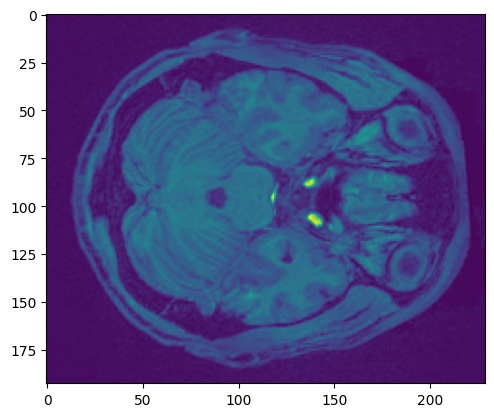

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(data.get_fdata()[:, :, 50]);

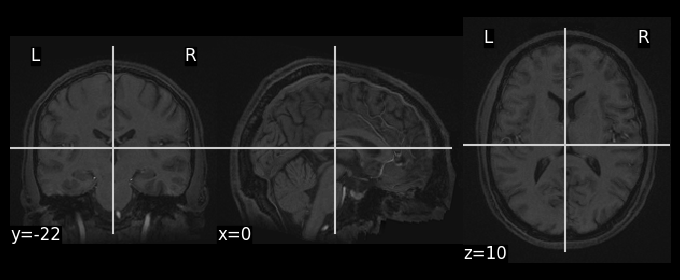

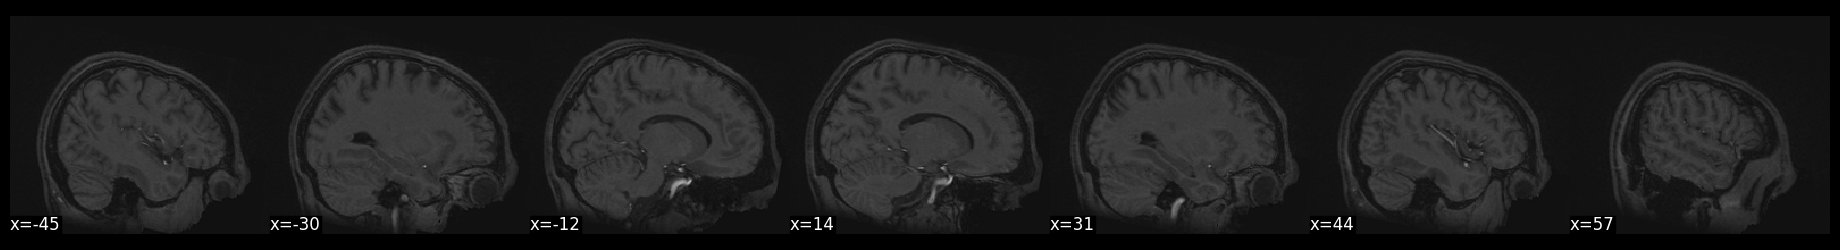

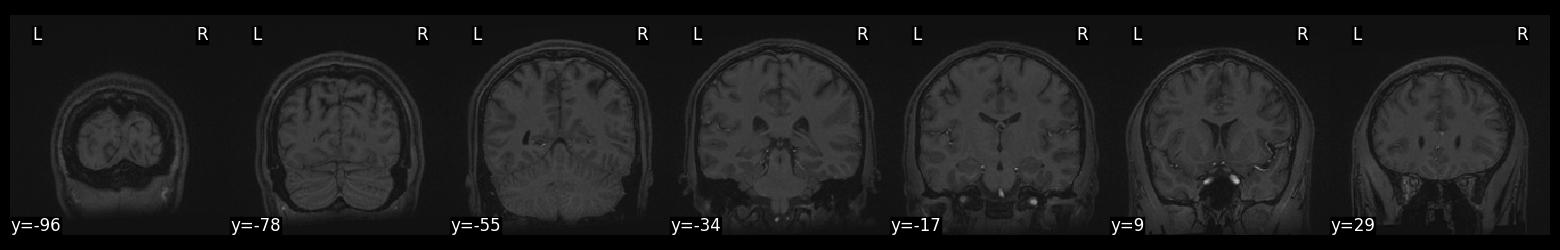

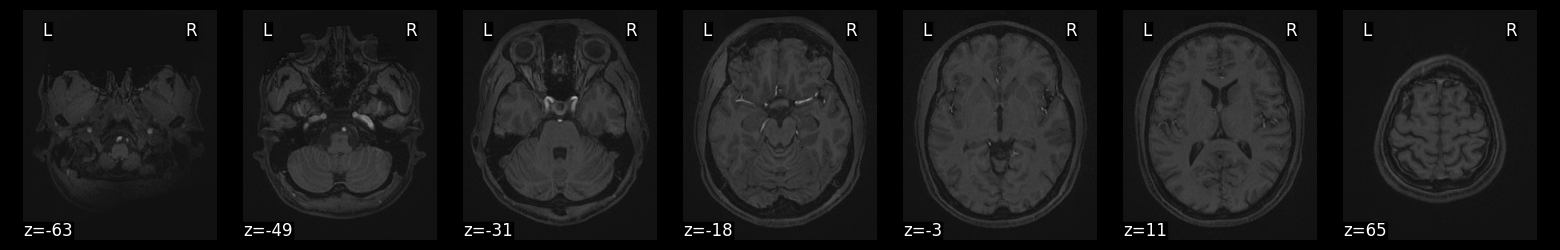

In [7]:
%matplotlib inline
from nilearn.plotting import view_img, plot_glass_brain, plot_anat, plot_epi
plot_anat(data)
plot_anat(data, draw_cross=False, display_mode='x')
plot_anat(data, draw_cross=False, display_mode='y')
plot_anat(data, draw_cross=False, display_mode='z');

/Users/timvigers/virtual_environments/neuroimaging/lib/python3.10/site-packages/nilearn/plotting/html_stat_map.py:219: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  bg_img = load_mni152_template()
/Users/timvigers/virtual_environments/neuroimaging/lib/python3.10/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



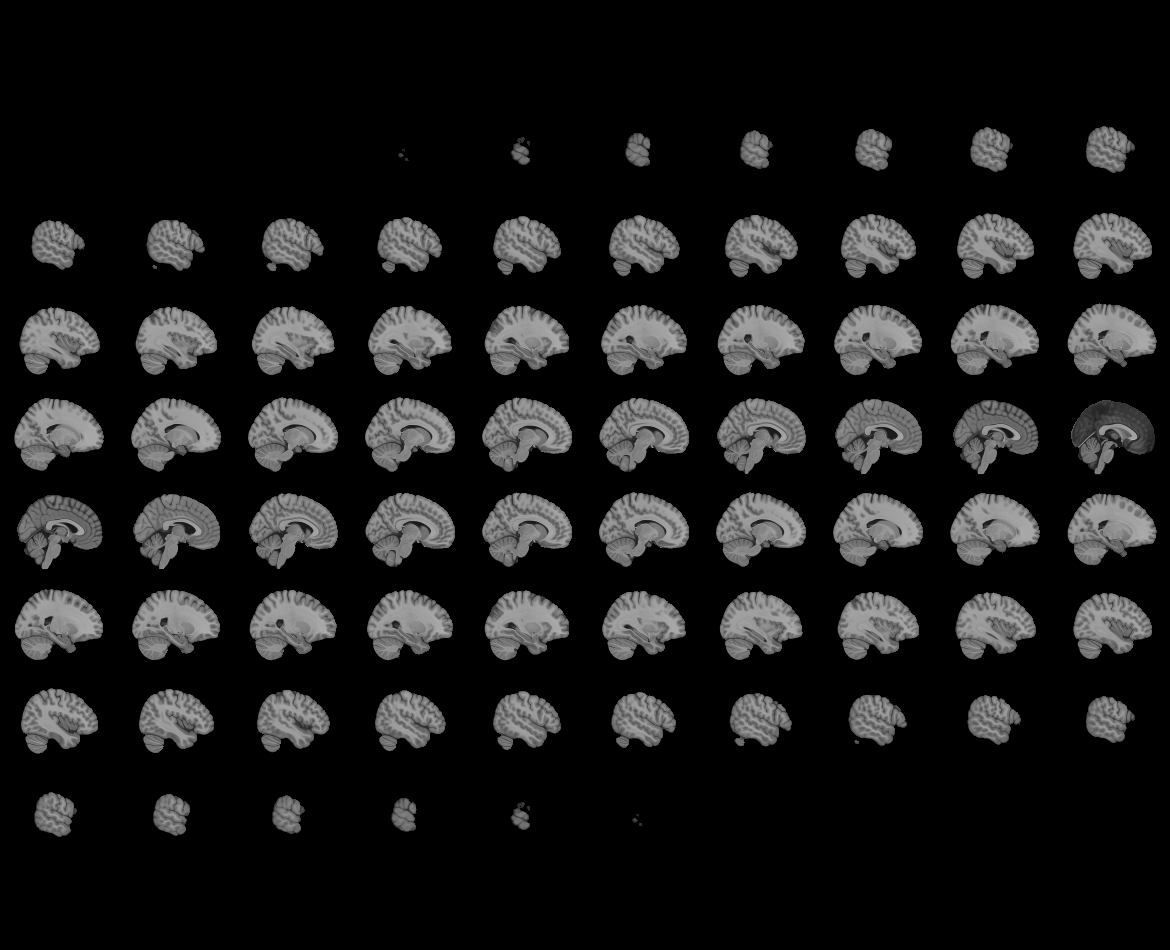
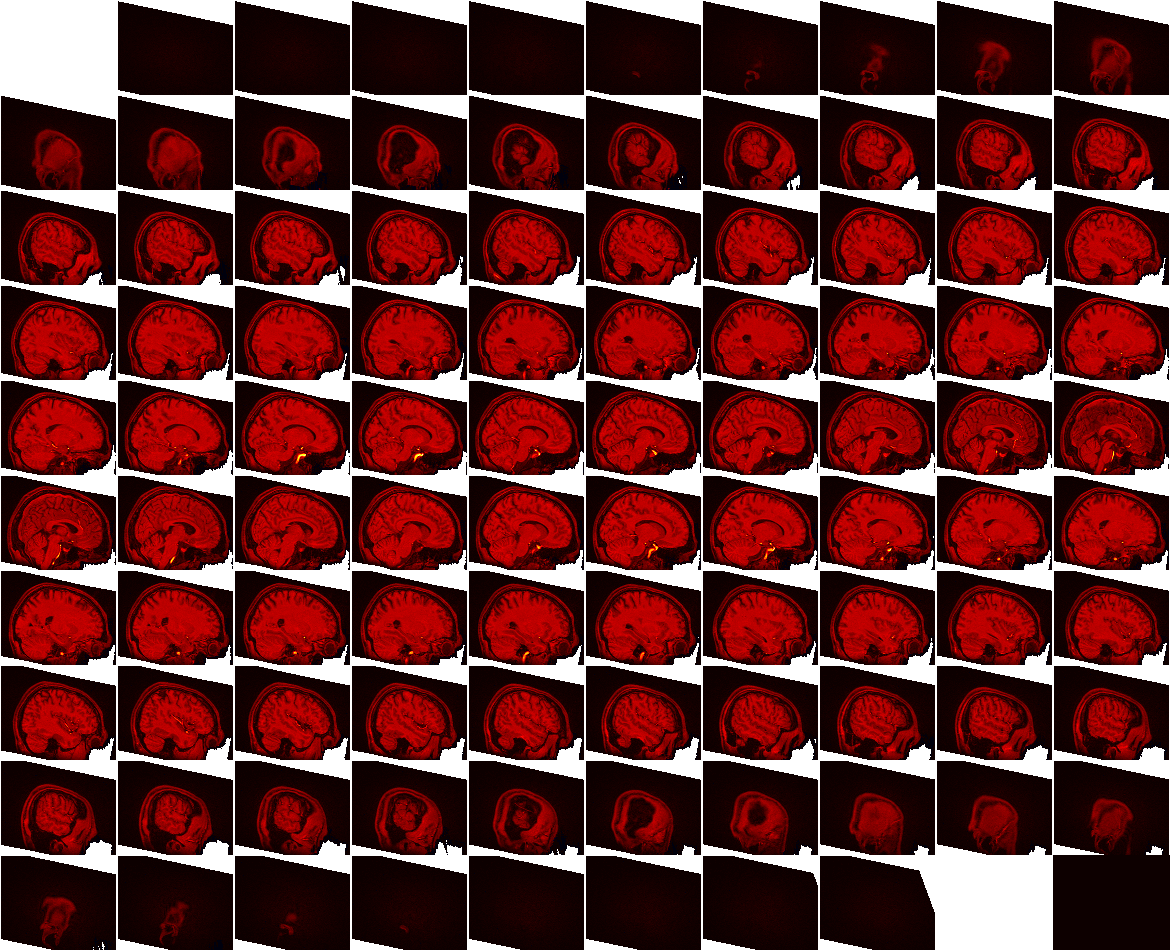

In [8]:
view_img(data)

The view_img function is particularly useful for overlaying statistical maps over an anatomical image so that we can interactively examine where the results are located.

As an example, let’s load a mask of the amygdala and try to find where it is located. We will download it from Neurovault using a function from nltools.

In [9]:
from nltools.data import Brain_Data
amygdala_mask = Brain_Data(
    'https://neurovault.org/media/images/1290/FSL_BAmyg_thr0.nii.gz').to_nifti()

view_img(amygdala_mask, data);

/Users/timvigers/virtual_environments/neuroimaging/lib/python3.10/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/timvigers/virtual_environments/neuroimaging/lib/python3.10/site-packages/nilearn/image/resampling.py:274: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn("Resampling binary images with continuous or "


We can also plot a glass brain which allows us to see through the brain from different slice orientations. In this example, we will plot the binary amygdala mask.

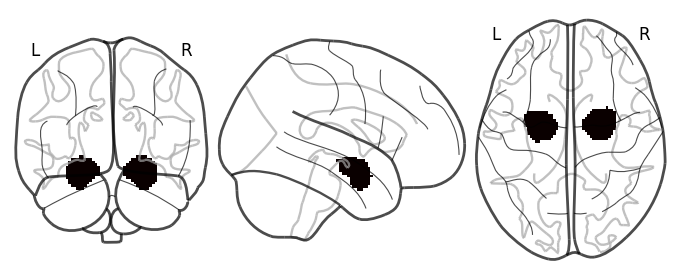

In [10]:
plot_glass_brain(amygdala_mask);

# Brain_Data basics

To get a feel for Brain_Data, let’s load an example anatomical overlay image that comes packaged with the toolbox.

In [11]:
from nltools.data import Brain_Data
from nltools.utils import get_anatomical

anat = Brain_Data(get_anatomical())
print(vars(anat))

{'mask': <nibabel.nifti1.Nifti1Image object at 0x2a5ad6dd0>, 'nifti_masker': NiftiMasker(mask_img=<nibabel.nifti1.Nifti1Image object at 0x2a5ad6dd0>), 'data': array([1875., 2127., 2182., ..., 5170., 5180., 2836.], dtype=float32), 'Y': Empty DataFrame
Columns: []
Index: [], 'X': Empty DataFrame
Columns: []
Index: []}


In [12]:
import os
data_dir = "/Users/timvigers/Documents/Neuroimaging/Examples/Localizer"
sub = 'sub-S01'
data = Brain_Data(os.path.join(data_dir, 'derivatives', 'fmriprep', sub, 'func',
                  f'{sub}_task-localizer_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'))

# Plotting

There are multiple ways to plot your data.

For a very quick plot, you can return a montage of axial slices with the .plot() method. As an example, we will plot the mean of each voxel over time.

In [13]:
data.mean().iplot();

interactive(children=(FloatText(value=0.0, description='Threshold'), HTML(value='Image is 3D', description='Vo…

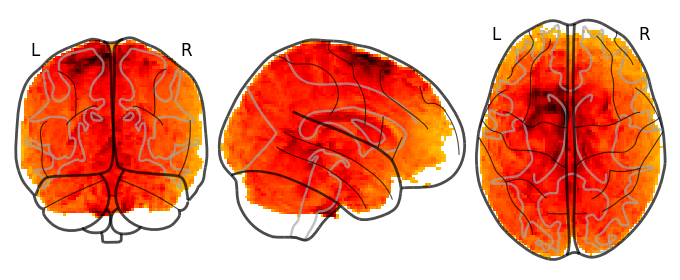

In [14]:
plot_glass_brain(data.mean().to_nifti());

# Exercises

For homework, let’s practice our skills in working with data.

Exercise 1

A few subjects have already been preprocessed with fMRI prep.

Use pybids to figure out which subjects have been preprocessed.

Exercise 2

One question we are often interested in is where in the brain do we have an adequate signal to noise ratio (SNR). There are many different metrics, here we will use temporal SNR, which the voxel mean over time divided by it’s standard deviation.
$ \text{tSNR}=\frac{\text{mean}(\text{voxel}_i)}{\text{std}(\text{voxel}_i)}$

In Exercise 2, calculate the SNR for S01 and plot this so we can figure which regions have high and low SNR.

Exercise 3

We are often interested in identifying outliers in our data. In this exercise, find any image that is outside 95% of all images based on global intensity (i.e., zscore greater than 2) from ‘S01’ and plot each one.